# 학습/테스트 데이터셋 분리
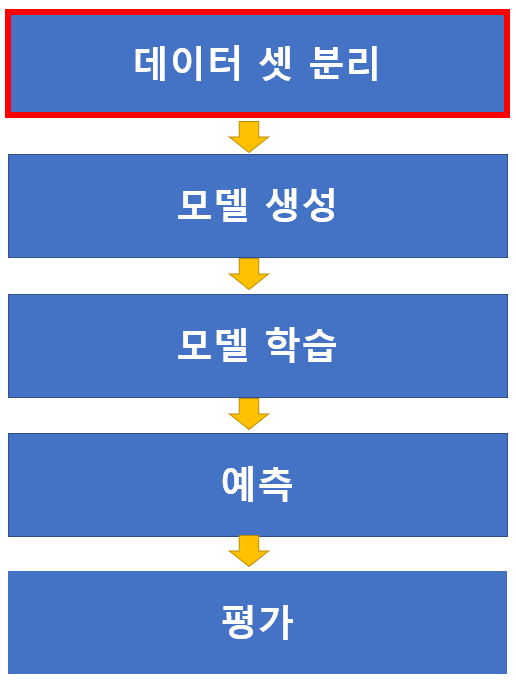

# 데이터셋(Dataset)
- **Train 데이터셋 (훈련/학습 데이터셋)**
    - 모델을 학습시킬 때 사용할 데이터셋.
- **Validation 데이터셋 (검증 데이터셋)**
    - 모델의 성능 중간 검증을 위한 데이터셋
- **Test 데이터셋 (평가 데이터셋)**
    - 모델의 성능을 최종적으로 측정하기 위한 데이터셋
    - **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용되야 한다.**
        - 모델을 훈련하고 평가했을때 원하는 성능이 나오지 않으면 데이터나 모델 학습을 위한 설정(하이퍼파라미터)을 수정한 뒤에 다시 훈련시키고 평가를 하게 된다. 원하는 성능이 나올때 까지 설정변경->훈련->평가를 반복하게 된다. 
        - 위 사이클을 반복하게 되면 평가결과를 바탕으로 설정을 변경하게 되므로 모델이 평가할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두개의 데이터셋만 사용하게 되면 모델의 성능을 제대로 평가할 수 없게 된다. 그래서 데이터셋을 train 세트, validation 세터, test 세트로 나눠 train set 와 validation set으로 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

# Hold Out - Data분리 방식 1
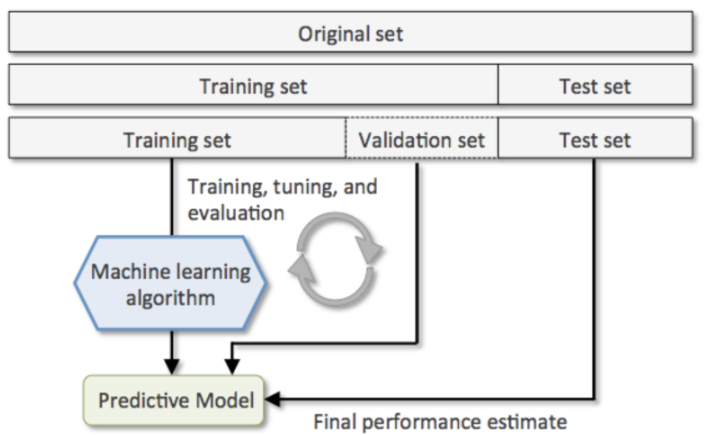

- 데이터셋을 Train set, Validation set, Test set으로 나눈다.
- sklearn.model_selection.train_test_split()  함수 사용
    - 하나의 데이터셋을 2 분할 해 주는 함수.

In [1]:
from sklearn.datasets import load_iris  # 데이터셋 로딩 함수
from sklearn.model_selection import train_test_split # 데이터셋을 2분할하는 함수
from sklearn.tree import DecisionTreeClassifier  # 분류를 위한 DecisionTree 모델 클래스
from sklearn.metrics import accuracy_score   # 정확도 평가를 해주는 평가 함수

In [3]:
def load_iris_data(return_X_y=False):
    if return_X_y == True:
        i = load_iris()
#         print(type(i))
#         print(i.keys())
        return i.data, i.target
    else:
        return load_iris()

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
X, y = load_iris(return_X_y=True)   #return_X_y=True: Feature와 target(label) 배열만 tuple에 묶어서 반환.
print(X.shape, y.shape)

(150, 4) (150,)


## Train/Test set 분리

In [44]:
X_train, X_test, y_train, y_test= train_test_split(X, # Feature(Input, X)
                                                   y, # Target(Label, Output, y)
                                                   test_size=0.3, # test 셋의 비율
                                                   random_state=0,# random seed 값 => shuffle을 random하게 한다.
                                                   stratify=y)
                                                   # **분류문제**에서 분할된 데이터셋의 class별 데이터수의 비율을 원본데이터셋과 동일하게 만들어준다.
# return: X(2개), y(2개)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 모델생성
dt_clf = DecisionTreeClassifier(random_state=0)
# 모델 학습
dt_clf.fit(X_train, y_train)
# 학습된 모델로 X_test 셋을 추론 및 평가
pred = dt_clf.predict(X_test)
# 평가
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

(105, 4) (45, 4) (105,) (45,)
예측 정확도: 0.9778


## Train/Validation/Test set 분리

In [45]:
# 원본 Dataset => Train/Test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# Train set => Train/Validation 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, #Train set
                                                  test_size=0.2, stratify=y_train, random_state=0)
X_train.shape, X_val.shape, X_test.shape

((96, 4), (24, 4), (30, 4))

In [47]:
import numpy as np
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([32, 32, 32], dtype=int64))
(array([0, 1, 2]), array([8, 8, 8], dtype=int64))
(array([0, 1, 2]), array([10, 10, 10], dtype=int64))


##### 모델생성, 평가

하이퍼파라미터(hyper parameter) 튜닝(tuning)
- max_depth=1 => 0.66666
- max_depth=2 => 1

> 하이퍼파라미터: 모델생성할때 우리가 설정해주는 설정값으로 모델 성능에 영향을 준다.
> 하이퍼파라미터 튜닝: 모델의 성능이 좋아지도록 하이퍼파라미터 값을 변경하는 것.

In [57]:
tree = DecisionTreeClassifier(random_state=0, max_depth= 2) 

# 학습-train
tree.fit(X_train, y_train)

# 평가-validation
pred_val = tree.predict(X_val)
val_acc = accuracy_score(y_val, pred_val)

print("val 정확도: ", val_acc)

val 정확도:  1.0


##### test set으로 최종검증

In [58]:
test_pred = tree.predict(X_test)
accuracy_score(y_test, test_pred)

0.9333333333333333

In [59]:
(1+5+100)/3

35.333333333333336

## Hold out 방식의 단점
- train/validation/test 셋이 어떻게 나눠 지냐에 따라 결과가 달라진다.
    - 데이터가 충분히 많을때는 변동성이 흡수되 괜찮으나 적을 경우 문제가 발생할 수 있다.
        - 이상치에 대한 영향을 많이 받는다.
        - 다양한 패턴을 찾을 수가 없기 때문에 새로운 데이터에 대한 예측 성능이 떨어지게 된다.
        
- **Hold out 방식은 (다양한 패턴을 가진) 데이터의 양이 많을 경우에 사용한다.**

# K-겹 교차검증 (K-Fold Cross Validation) - Data분리 방식 2
1. 데이터셋을 설정한 K 개로 나눈다.
1. K개 중 하나를 검증세트로 나머지를 훈련세트로 하여 모델을 학습시키고 평가한다. 
1. K개 모두가 한번씩 검증세트가 되도록 K번 반복하여 모델을 학습시킨 뒤 나온 평가지표들을 평균내서 모델의 성능을 평가한다.

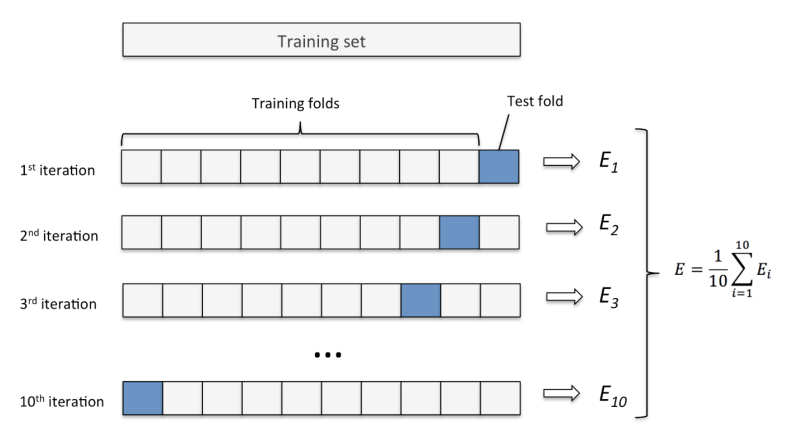

- 데이터양이 충분치 않을때 사용한다.
- 보통 Fold를 나눌때 2.5:7.5 또는 2:8 비율이 되게 하기 위해 4개 또는 5개 fold로 나눈다. 
- 종류
    - **KFold**
        - 회귀문제의 Dataset을 분리할 때 사용
    - **StratifiedKFold**
        - 분류문제의 Dataset을 분리할 때 사용

## KFold
- 지정한 개수(K)만큼 분할한다.
- Raw dataset의 순서를 유지하면서 지정한 개수로 분할한다.
- 회귀 문제일때 사용한다.
- KFold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- KFold객체.split(데이터셋)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 **index**들을 반환하는 generator 생성 

In [60]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold   #KFold 클래스 - train_test_split()와 동일한 모듈
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

In [78]:
kfold = KFold(n_splits=3) #객체 생성시 k값(몇개 fold로 나눌지) 지정
ex = kfold.split(X)       #split(데이터셋) : index를 제공하는 generator를 반환
print(type(ex))

<class 'generator'>


In [79]:
next(ex)  #(배열-train index,  배열-val index)

(array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
         63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
         76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
         89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]))

In [63]:
next(ex)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49, 100, 101,
        102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
        115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149]),
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
        67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
        84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]))

In [64]:
next(ex)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
        139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]))

In [68]:
# next(ex)

In [71]:
# 각 fold별 검증 결과들을 담을 리스트
acc_train_list = [] # trainset으로 평가한 결과
acc_test_list = []  # test dataset으로 평가한 결과

# KFold 객체 생성 - 3개 fold
kfold = KFold(n_splits=3)

for train_index, test_index in kfold.split(X):   #split() generator생성 => 튜플 (train set index,  test set index)
    
    # KFold generator가 제공한 index를 이용해 data 조회
    X_train, y_train = X[train_index], y[train_index] #train set 추출
    X_test, y_test = X[test_index], y[test_index]     #test set 추출
    
    # 모델생성
    tree = DecisionTreeClassifier()
    
    # 학습
    tree.fit(X_train, y_train)
    
    # 추론
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    # 평가 - 정확도 
    acc_train = accuracy_score(y_train, pred_train)  #(정답, 예측값)
    acc_test = accuracy_score(y_test, pred_test)
    acc_train_list.append(acc_train)  #평가결과들을 list에 append(추가)
    acc_test_list.append(acc_test)

In [72]:
acc_train_list, np.mean(acc_train_list)

([1.0, 1.0, 1.0], 1.0)

In [73]:
acc_test_list, np.mean(acc_test_list) 
# 정확도 0.0 : 한개도 못맞췄다. ===> 분류문제일 경우 KFold(회귀)를 사용하지 말고 StratifiedKFold를 사용해야 한다.

([0.0, 0.0, 0.0], 0.0)

In [74]:
np.unique(y_train)

array([0, 1])

In [75]:
np.unique(y_test)

array([2])

In [76]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

## StratifiedKold
- 나뉜 fold 들에 label들이 같은(또는 거의 같은) 비율로 구성 되도록 나눈다. 
- 각각의 클래스 별로 각각 순서대로 나눈다.
- 분류문제일 때 사용한다.
- StratifiedKold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- StratifiedKold객체.split(X, y)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 index들을 반환하는 generator 생성
    - input(X)와 output(y) dataset을  전달한다. 

In [80]:
from sklearn.model_selection import StratifiedKFold

X, y = load_iris(return_X_y=True)

In [84]:
s_fold = StratifiedKFold(n_splits=3)
ex = s_fold.split(X, y)
type(ex)

generator

In [85]:
r = next(ex)
r

(array([ 17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
        128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 143, 144, 145, 146, 147, 148, 149]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  50,  51,  52,  53,  54,  55,  56,  57,  58,
         59,  60,  61,  62,  63,  64,  65,  66, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]))

In [87]:
np.unique(y[r[0]], return_counts=True)  #train set index로 y값을 조회 => class별 개수 확인

(array([0, 1, 2]), array([33, 33, 34], dtype=int64))

In [88]:
np.unique(y[r[1]], return_counts=True) #test set

(array([0, 1, 2]), array([17, 17, 16], dtype=int64))

In [89]:
# 폴더별 검증 결과들을 담을 list
acc_train_list = []
acc_test_list = []

s_fold = StratifiedKFold(n_splits=3)

for train_index, test_index in s_fold.split(X, y):  # 반복-튜플 (train index,  test index)
    
    # train/test 데이터셋 추출
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    # 모델생성
    tree = DecisionTreeClassifier()
    
    # 학습
    tree.fit(X_train, y_train)
    
    # 추론
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    # 평가
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    
    acc_train_list.append(acc_train)
    acc_test_list.append(acc_test)


In [90]:
print(acc_train_list, np.mean(acc_train_list))

[1.0, 1.0, 1.0] 1.0


In [91]:
print(acc_test_list, np.mean(acc_test_list))

[0.98, 0.92, 0.98] 0.96


In [96]:
def my_cross_val_score(k, X, y, model):
    acc_train_list = []
    acc_test_list = []

    s_fold = StratifiedKFold(n_splits=k)

    for train_index, test_index in s_fold.split(X, y):  # 반복-튜플 (train index,  test index)

        # train/test 데이터셋 추출
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]

#         # 모델생성
#         tree = DecisionTreeClassifier()

        # 학습
        model.fit(X_train, y_train)

        # 추론
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        # 평가
        acc_train = accuracy_score(y_train, pred_train)
        acc_test = accuracy_score(y_test, pred_test)

        acc_train_list.append(acc_train)
        acc_test_list.append(acc_test)
        
    return acc_test_list

In [97]:
iris = load_iris()
my_cross_val_score(3, iris.data, iris.target, DecisionTreeClassifier())

[0.98, 0.94, 0.96]

In [98]:
my_cross_val_score(5, iris.data, iris.target, DecisionTreeClassifier())

[0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 1.0]

## cross_val_score( )
- 데이터셋을 K개로 나누고 K번 반복하면서 평가하는 작업을 처리해 주는 함수
- 주요매개변수
    - estimator: 모델객체
    - X: feature(input data)
    - y: label(output data)
    - scoring: 평가지표
    - cv: 나눌 개수 (K)
        - int: 개수
        - KFold, StratifiedKFold 객체
- 반환값: array - 각 반복마다의 평가점수    

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score  
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=0)

data = iris_data.data
label = iris_data.target

# scores = cross_val_score(dt_clf , data , label , scoring='accuracy', cv=3)
# kfold = KFold(n_splits=3)
kfold = StratifiedKFold(n_splits=3)
scores = cross_val_score(dt_clf , data , label , scoring='accuracy', cv=kfold)  
print(scores)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
교차 검증별 정확도: [0.9667 0.9667 0.9    0.9667 1.    ]
평균 검증 정확도: 0.96
